In [115]:
library("rio")
library("ggplot2")
library("forecast")
library("tseries")
library("tidyverse")
library(readxl)
library(zoo)


In [116]:
data <- read.csv("Monthly_data_cmo.csv")
data <- data.frame(data)
data <- data[order(data[,9]),]
data <- subset(data, select =-c(state_name))
data$APMC <- tolower(data$APMC)
data$Commodity <- tolower(data$Commodity)
data$Month <- tolower(data$Month)
data$FLAG = 0

In [118]:
for(i in 5:8){
  data[is.na(data[,i]), i] <- mean(data[,i], na.rm = TRUE)
}

In [135]:
msp_data <- read.csv("CMO_MSP_Mandi.csv")
map_data <- data.frame(msp_data)
msp_data <- msp_data[order(msp_data[,1]),]
msp_data <- subset(msp_data, select = c(commodity, msprice, year))
msp_data$commodity <- tolower(msp_data$commodity)

In [136]:
flag <- data.frame(APMC = character(1),Commodity = character(1),stringsAsFactors=FALSE)

In [137]:
season <- function(source,apmc, commodity,attribute,freq,plot = FALSE){
    data1 <- subset(source, APMC == as.character(apmc))
    data1 <- subset(data1, Commodity == as.character(commodity))
    
    data1$arrivals_in_qtl = tsclean(ts(data1[, c('arrivals_in_qtl')]))
    data1$min_price = tsclean(ts(data1[, c('min_price')]))
    data1$max_price = tsclean(ts(data1[, c('max_price')]))
    data1$modal_price = tsclean(ts(data1[, c('modal_price')]))

    count_ma = ts((data1[[attribute]]),frequency = freq)
    decomp = stl(count_ma,"periodic")
    
    deseasonal_cnt <- seasadj(decomp)
    count_dl = diff(deseasonal_cnt)
    if(plot ==  TRUE){
        plot(decomp) 
    }
        test <- adf.test(count_ma,alternative = "stationary")$p.value
    if(test > 0){

    flag <<- rbind(flag, c(apmc,commodity))
   }
    
    data1[[attribute]] = deseasonal_cnt
    return <- list(data1, test,c(apmc,commodity))
    return
}

In [138]:
final <- function (apmc,comm,attribute){
ans1 <- season(source = data, apmc = as.character(apmc),commodity = as.character(comm) ,attribute = attribute,freq=4)
a <- subset(msp_data, commodity == comm)
a <- subset(a , year > 2013)

ggplot()+
geom_line(data= data.frame(a) , aes(y = msprice , x= as.numeric(year))) +
geom_line(data= data.frame(ans1[1]) , aes(y = as.numeric(min_price) , x= as.numeric(Year)))
    
    }


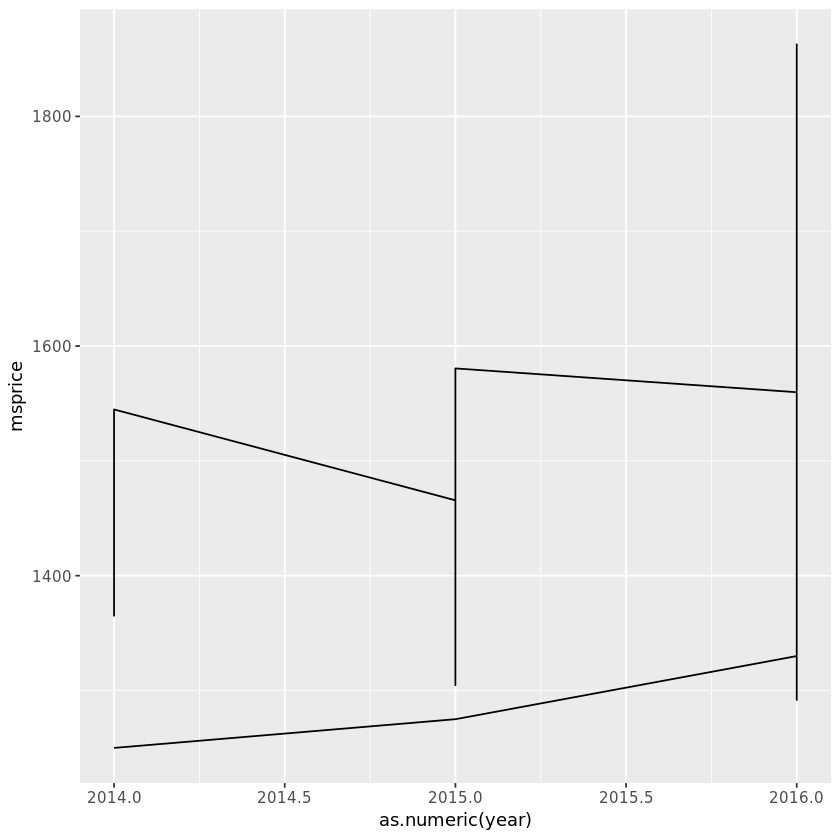

In [139]:
final(apmc = "ahmednagar", comm = "bajri", attribute = "min_price")

In [140]:
flag

APMC,Commodity
,
ahmednagar,bajri


In [145]:
apmc <- unique(data$APMC)
comm <- unique(msp_data$commodity)

In [146]:
str(comm)

 chr [1:32] "bajri" "barli" "coconut" "cotton" "copra (ball)_yellow" ...


In [147]:
for(i in apmc){
    for(j in comm){
        final(apmc = i,comm = j,attribute = "min_price")
    }
}

ERROR: Error in ts(data1[, c("arrivals_in_qtl")]): 'ts' object must have one or more observations
